#Introduction


The task assigned is to create a Convolutional Neural Network, using a custom dataset, of about 20 characters in different images, then using  to visualize it. A model will be created, which will be used to carry out this task.

#The Dataset

The Dataset consists of approximately 20 images of each different numerical characters, using CV2. The images are then loaded and put in a list.

#Loading the dataset

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np # used to do various array operations
import os # used to iterate through the directories and join paths
import tensorflow as tf
import cv2 # used to do image operations


#Creating the image data and the labels from the images 

- img_folder -> the source folder, it is the input parameter containing the images for different classes.
- The images are converted to be represented as a numpy array
- The datatype is float32
- The image array is normalized to have values scaled down between 0 and 1 from 0 to 255 for similar distribution.

In [2]:
#Setting the image dimension and source folder for loading the dataset
IMG_WIDTH=28
IMG_HEIGHT=28



In [66]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, 0)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
   

In [59]:
# extracting the image array and class name
img_data, class_name =create_dataset("/content/drive/My Drive/CNNimages")

#Visualizing the images




In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


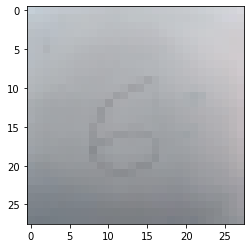

In [67]:
plt.imshow(img_data[1])

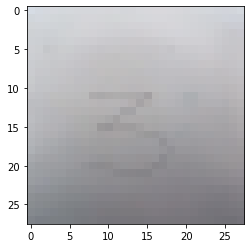

In [68]:
plt.imshow(img_data[19])

#Preparing the Data

In [8]:
imag=np.array(img_data)

Reshaping the numpy array of data to fit the model to be used.

In [9]:
imag =imag.reshape((60,28,28,1))

In [10]:
imag.shape

(60, 28, 28, 1)

#Creating the neural network

#Loading the model

In [12]:
from tensorflow.keras.models import Sequential as sq

In [13]:
cnn = sq()

In [14]:
cnn

#Adding layers to the network

In [15]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [16]:
#Adding coonv2D which implements a convolutional layer (layer 1)
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [17]:
cnn

In [18]:
#pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
cnn

In [20]:
#Convo layer 2
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [21]:
#pooling layer 2
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
cnn

In [23]:
#Flattening the results
cnn.add(Flatten())

In [25]:
cnn

In [26]:
cnn.add(Dense(units=128, activation='relu'))

In [27]:
cnn.add(Dense(units=10, activation='softmax'))

In [29]:
cnn.summary()# gives a summary of the model 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# Visualizing the model structure

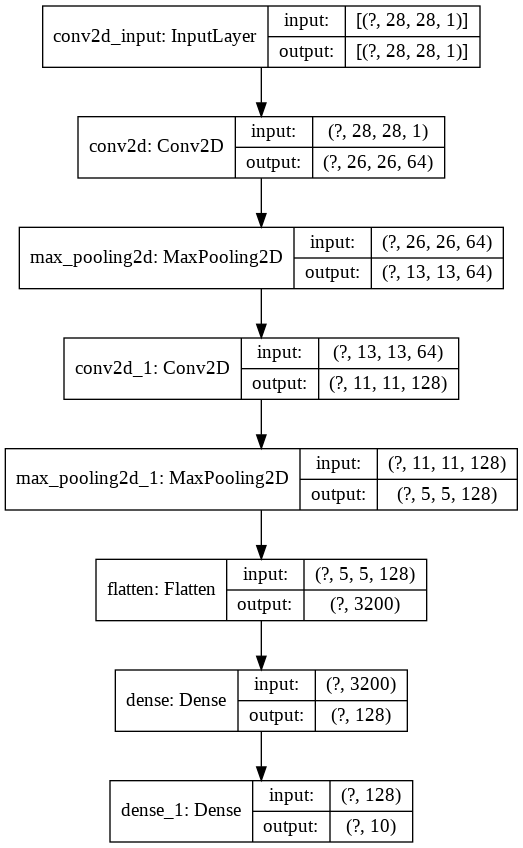

In [30]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convonet.png', show_shapes=True, show_layer_names=True)
Image(filename='convonet.png')# display the image

# Training and evaluation

In [32]:
#compiling the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import TensorBoard
import time

Evaluating the model

In [37]:
#Defining class values
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [38]:
target_dict

{'testing': 0, 'training': 1}

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
target_val=to_categorical(target_val)

In [ ]:
#evaluating the model on unseen data using the evaluate method
loss, accuracy = cnn.evaluate(x_test, y_test)

In [41]:
target_val.shape

(20, 2)

In [42]:
target_val

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [48]:
predictions=cnn.predict(imag)

In [49]:
images=imag.reshape((60,28,28))
incorrect_predictions=[]

In [50]:
for i, (p,e) in enumerate(zip(predictions,target_val)):
    predicted, expected = np.argmax(p),np.argmax(e)
    if predicted != expected: # prediction was incorrect
        incorrect_predictions.append((i,images[i],predicted, expected))

In [51]:
len(incorrect_predictions)

20

There are 20 inaccurate predictions from the model.

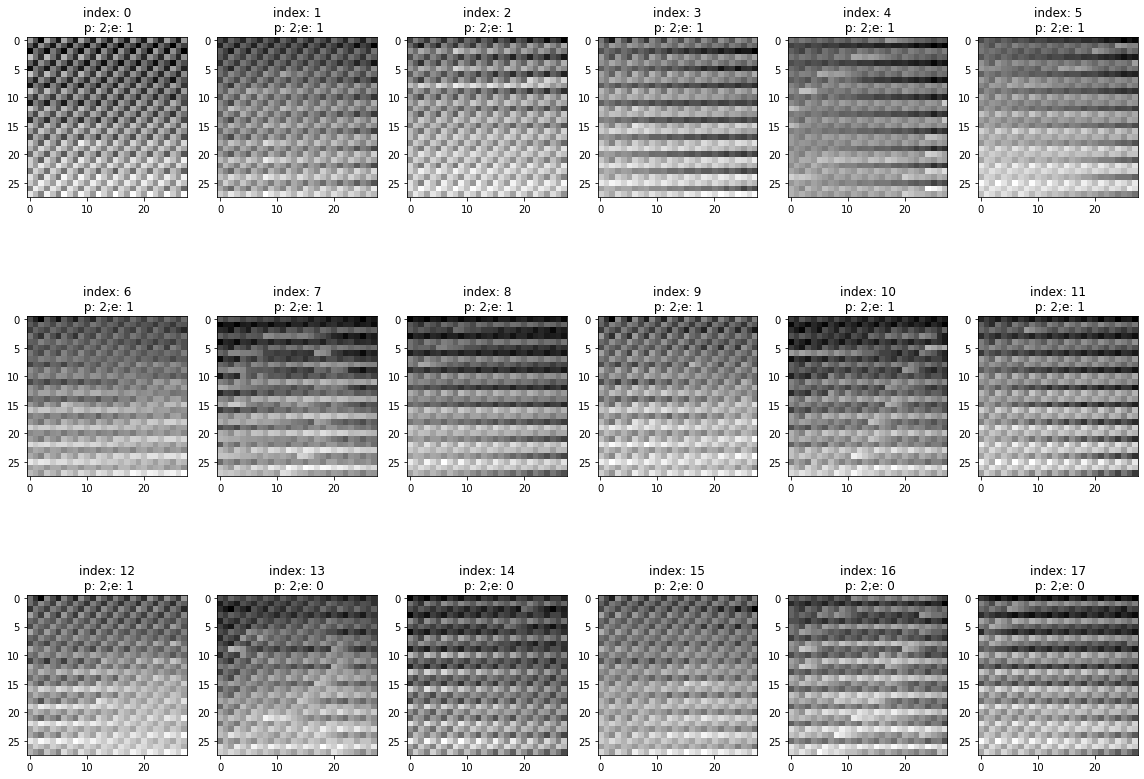

In [69]:
figure, axes=plt.subplots(nrows=3, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image,predicted, expected = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_title(f'index: {index}\n p: {predicted};e: {expected}')
plt.tight_layout()

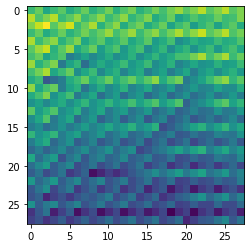

In [70]:
plt.imshow(images[13])

In [71]:
for index,probability in enumerate(predictions[8]):
    print(f"{index}: {probability:.10%}")

0: 9.3620941043%
1: 9.9261209369%
2: 11.4522047341%
3: 9.2727206647%
4: 10.9389431775%
5: 8.9307375252%
6: 10.5918087065%
7: 9.4804309309%
8: 9.1473981738%
9: 10.8975380659%


The model predicts the character to be a 2. It is almost accurate but it seeems to be quite 'confused'.

#Conclusion

From this, I am able to conclude that the model has very low accuracy. This may be due to overfitting

#Recommendations

The model can be improved in the following ways:
* Changing the architecture of the model
* Increase the dataset
* Increase the number of epochs
* Remove the missing values